<a href="https://colab.research.google.com/github/Christy-1999/Silver-Eureka/blob/master/Image%20classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
print('Number of training images:',X_train.shape)
print('Number of testing images: ',X_test.shape)

Number of training images: (50000, 32, 32, 3)
Number of testing images:  (10000, 32, 32, 3)


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(X_train, y_train, 8)

NameError: ignored

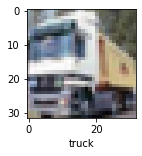

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.9333 - accuracy: 0.3052
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6489 - accuracy: 0.4153
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5486 - accuracy: 0.4519
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4827 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4351 - accuracy: 0.4904


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test_scaled
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.47      0.52      1000
           1       0.62      0.63      0.62      1000
           2       0.41      0.21      0.28      1000
           3       0.40      0.14      0.20      1000
           4       0.31      0.47      0.38      1000
           5       0.45      0.31      0.37      1000
           6       0.31      0.83      0.45      1000
           7       0.75      0.26      0.39      1000
           8       0.52      0.72      0.60      1000
           9       0.65      0.45      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.43     10000
weighted avg       0.50      0.45      0.43     10000



In [ ]:
cnn = keras.Sequential([  
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  
    ])

cnn.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.1604 - accuracy: 0.2050
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6833 - accuracy: 0.4020
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4692 - accuracy: 0.4742
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3548 - accuracy: 0.5180
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2712 - accuracy: 0.5498
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2004 - accuracy: 0.5746
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1439 - accuracy: 0.5996
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0844 - accuracy: 0.6227
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0366 - accuracy: 0.6381
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [ ]:
cnn.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 4s 12ms/step - loss: 1.0825 - accuracy: 0.6236


[1.0825433731079102, 0.6236000061035156]

In [ ]:
y_pred = cnn.predict(X_test_scaled)
y_pred[:5]

array([[3.9497968e-03, 2.3103284e-04, 8.3153352e-02, 6.4285779e-01,
        9.2355078e-03, 1.8353982e-01, 6.2085181e-02, 9.0362050e-04,
        1.3866149e-02, 1.7783266e-04],
       [2.0361351e-02, 4.3336999e-02, 8.8810433e-05, 3.2427793e-05,
        2.9694425e-05, 1.2786519e-06, 6.7250126e-06, 1.1393805e-05,
        9.3109030e-01, 5.0409921e-03],
       [1.0232571e-01, 1.5074725e-01, 1.2510193e-03, 2.4455301e-03,
        2.7250345e-03, 3.0829886e-04, 2.0413587e-04, 1.2563576e-03,
        7.0366722e-01, 3.5069436e-02],
       [6.6995639e-01, 1.2075764e-02, 1.4438118e-02, 8.8536221e-04,
        9.4585149e-03, 7.1139933e-05, 3.6758746e-04, 3.0278618e-04,
        2.9188660e-01, 5.5777677e-04],
       [4.5776327e-05, 9.2912269e-05, 3.6076337e-02, 7.8989275e-02,
        4.0701813e-01, 3.1588152e-02, 4.4383135e-01, 3.0572960e-04,
        1.9601975e-03, 9.2134811e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

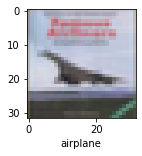

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'